## PyTorch Workflow

Let's explore an example PyTorch end to end workflow

Resources:
* Ground truth notebook
* Book version of notebook
* Ask a question

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neuraal network
import matplotlib.pyplot as plt

#Check PyTorch version
# torch._version_

## Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel speadsheet
* Images of any kind
* Videos(Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical repressentation.
2. Build a model to learn patterns in that numerical representation.

To showcase this ,let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10],Y[:10],len(X),len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general.)

Let's create a training and test set with the data

In [ ]:
# Create a train/test spllit
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

To splt the data into train and test set more flexibly we can use scikit-learn library

In [ ]:
# @title
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

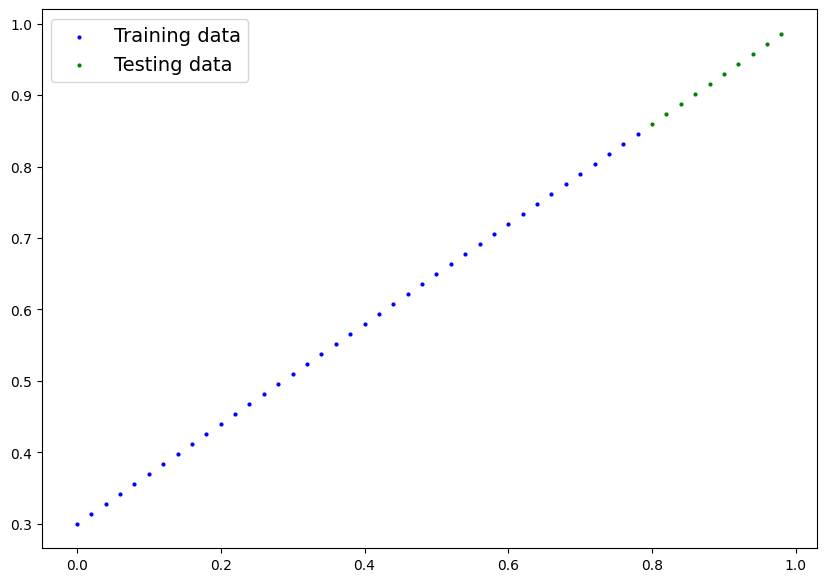

In [ ]:
plot_predictions();

## 2. Building model

Our first PyTorch model!

What our model does:
* Start with randm vales(weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to ) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms

1.Gradient decent

2.Backpropagation

In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch
  def __init__(self):
   super().__init__()  #super().__init__() calls the constructor of the parent class (nn.Module)
   self.weights = nn.Parameter(torch.randn(1,
                                           dtype=torch.float, # Changed to keyword argument
                                           requires_grad=True)) # pytorch will track the gradient of this parameter
   self.bias = nn.Parameter(torch.randn(1,
                                        dtype=torch.float, # Changed to keyword argument
                                        requires_grad=True)) # pytorch will track the gradient of this parameter

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the lnear regression formula

### Checking the contents of our PyTorch model

Now we've create4d a model, let's see wht's inside...

So we can check our model parameters or what's inside our model using `.parameter()`

In [ ]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`
To check if it predicts y_test based on x_test input.

When we pass data through our moel,it's going to run it through the forward() method.


In [ ]:
X_test,Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make predictions with model
with torch.inference_mode():  # it turns off gradient tracking for y_preds(i.e. y_preds are computed without tracking gradients and it is necessary for training but not for inference)
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
# Making prediction on plain model inference and torch.no_grad()
# y_preds = model_0(X_test)
# y_preds   ## NOTE: the grad_fn=<AddBackward0> at last of the printed y_preds


# with torch.no_grad():
#   y_preds = model_0(X_test)
# y_preds

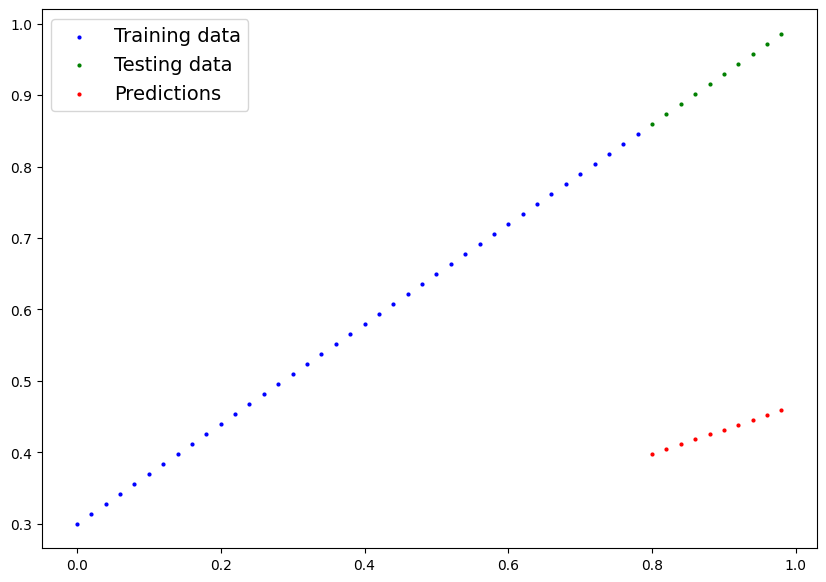

In [ ]:
plot_predictions(predictions = y_preds)

## 3. Train model

The whole idea of taining is ofr a model to move form some unknown parameters (these may be random) to some known parameters.

Or in other words from a poor repressentation of the data to a better representationof the data.

One way to measure how poor or how wrong your models predictions are is to use a loss fucntion.

* **NOTE:** Loss funciton may also be called costr fucntion or criterion in different areas. For our case we're going to refer to it as a loss fucntion.

Things we need to train:

* **Loss fucntion:** A fucntion to measure how wrong your model's prediciton are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loass of a model and adjusts the model's parameters(e.g. weight & bias)

  * `params` - the model parameters you'd like to optimize, for example params = model_0.parameters()

  * `lr` (learing rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small `lr` results in small changes, a large `lr` results in large changes)

And specificaly for PyTorch , we need:

* A training loop

* A testing loop

In [ ]:
# Check out our model's parameters (a parameters is a value tha tthe model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # learning rate = possibly the most important hyperparameters you can set

### Builing a training looop (an training loop) in pytorch

A couple of things e nee in a training loop:
0. Loop through the data
1. Forward pass(this involves data moving through our model's `forward()` fucntions) to make predictions on data- also called forward propagation
2. Calculate the loss(compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwrd through the network to calculate the gradients of each of the parameters of our model with respect ot the loss(**backpropagation**)
5. Optimizer step - use the optmizer to adjust our model's parameters to try and improve the loss


In [ ]:
# value of parameters before running below training loop
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data....(this is a hyperparameter because we've set it ourselves)
epochs = 200

# Create empty loss lists to track values and evalute models progress
train_loss_values = []
test_loss_values = []
epoch_count = []

### Training
# 0.Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()  # train mode in PyTorch sets all paramters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,Y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation  on th loss with respect ot the parameters of the mode
  loss.backward()

  # 5> Step the optimizer (perform gradient descent)
  optimizer.step()

  # Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing(dropout)
  with torch.inference_mode():  # turns off gradient tracking & a couple more things behind the scenes
    test_pred = model_0(X_test)  # Do a forward pass
    test_loss = loss_fn(test_pred,Y_test)  # Calculate the loss

  # Print out what's happening
  if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

  # Print out model state_dict()
  print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss: 0.20919232070446014
O

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
epoch_count,train_loss_values,test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [array(0.31288138, dtype=float32),
  array(0.19767132, dtype=float32),
  array(0.08908726, dtype=float32),
  array(0.05314853, dtype=float32),
  array(0.04543797, dtype=float32),
  array(0.04167863, dtype=float32),
  array(0.03818933, dtype=float32),
  array(0.0347609, dtype=float32),
  array(0.03132383, dtype=float32),
  array(0.0278874, dtype=float32),
  array(0.02445896, dtype=float32),
  array(0.02102021, dtype=float32),
  array(0.01758547, dtype=float32),
  array(0.01415539, dtype=float32),
  array(0.01071659, dtype=float32),
  array(0.00728353, dtype=float32),
  array(0.00385178, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32)],
 [array(0.48106518, dtype=float32),
  array(0.3463552, dtype=float32),
  array(0.2172966, dtype=float32),
  array(0.14464018, dtype=float32),
  array(0

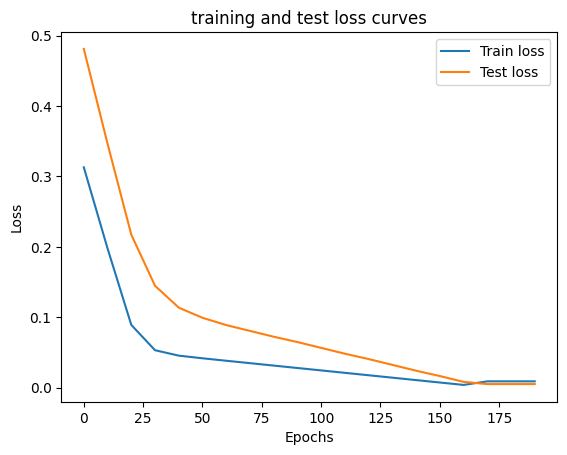

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values,label="Train loss")
plt.plot(epoch_count, test_loss_values,label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
# predicti t)

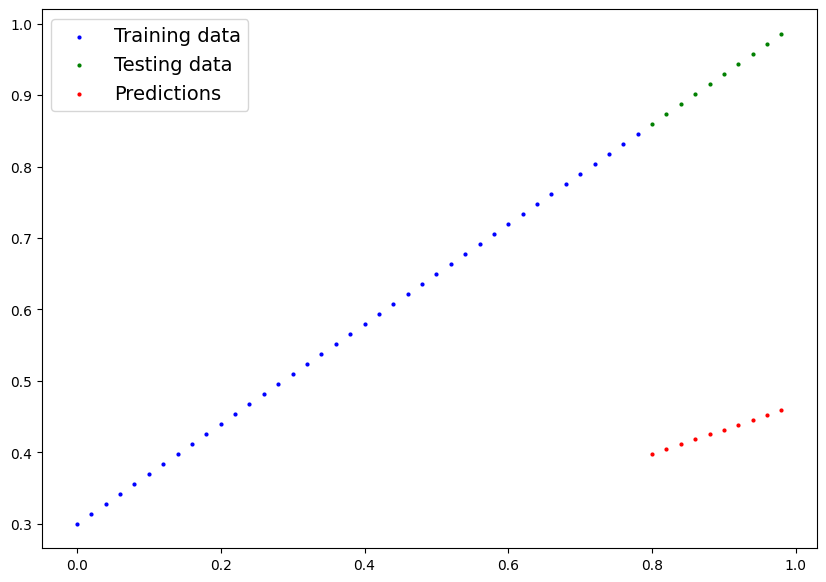

In [ ]:
# plotting data before training model
plot_predictions(predictions=y_preds)

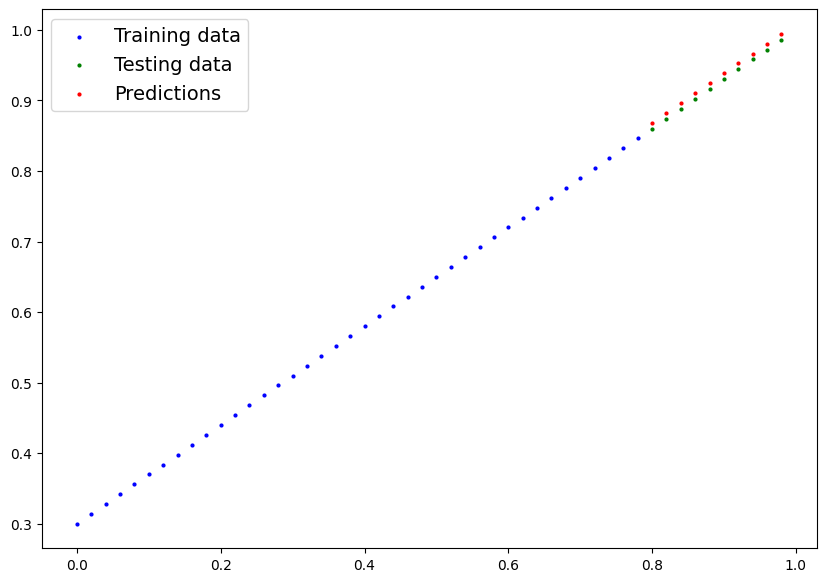

In [ ]:
# plotting data after training model
plot_predictions(predictions=y_preds_new)

## Saving a model in Pytorch

There are three main methods you should about forsaving and loading models in PyTorch.

1.`torch.save()` - allows you save a PyTorch object in Python's pickle format

2.`torch.load()` - allows you load a saved PyTorch object

3.`torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Saving our Pytorch model
from pathlib import Path  # to manage directory in python we use Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Feb 16 18:32 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire mdoel, we'll create a new instance of our model class and load the saved `state_dict()` into that.


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model into evaluation mode
loaded_model_0.eval()

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Create device - agnostic code.
This means if we've got access to a GPU, our code will use it.

If no GPU is available , the code will default to using CPU.

In [1]:
import torch
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [5]:
!nvidia-smi

Thu Mar 13 16:50:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----